In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_excel(r"C:\Users\Shaurya\Desktop\india_test.xlsx",index_col="Date",parse_dates=["Date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2020-03-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Daily Confirmed  439 non-null    int64
 1   Total Confirmed  439 non-null    int64
 2   Total Recovered  439 non-null    int64
 3   Total Deceased   439 non-null    int64
 4   Active Case      439 non-null    int64
dtypes: int64(5)
memory usage: 20.6 KB


In [4]:
df = df.astype('float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2020-03-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Daily Confirmed  439 non-null    float64
 1   Total Confirmed  439 non-null    float64
 2   Total Recovered  439 non-null    float64
 3   Total Deceased   439 non-null    float64
 4   Active Case      439 non-null    float64
dtypes: float64(5)
memory usage: 20.6 KB


In [6]:
df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case
Date,,,,,
2021-05-10,329491.0,22991820.0,19021163.0,249436.0,3721221.0
2021-05-11,348555.0,23340375.0,19376561.0,253634.0,3710180.0
2021-05-12,362632.0,23703007.0,19728566.0,257762.0,3716679.0
2021-05-13,343005.0,24046012.0,20073242.0,261762.0,3711008.0
2021-05-14,326014.0,24372026.0,20426092.0,265638.0,3680296.0


<AxesSubplot:xlabel='Date'>

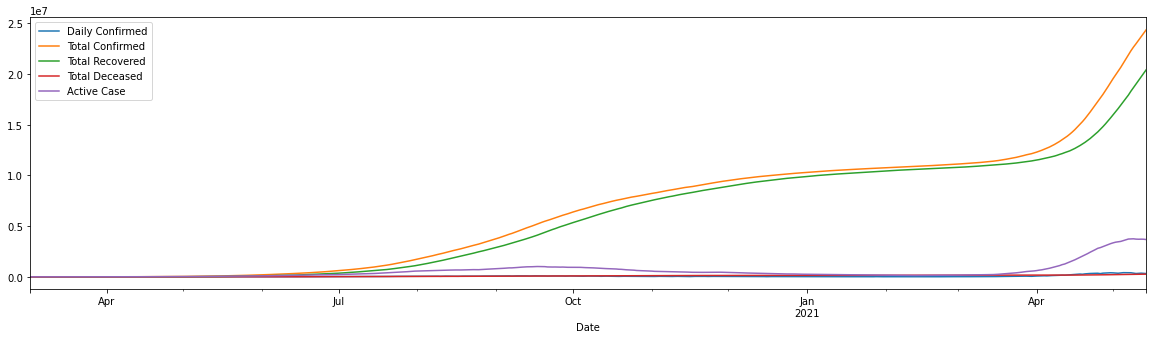

In [7]:
df.plot(figsize=(20,5))

In [8]:
df.tail(20)

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case
Date,,,,,
2021-04-25,354658.0,17306404.0,14296564.0,194527.0,2815313.0
2021-04-26,319471.0,17625875.0,14545573.0,197289.0,2883013.0
2021-04-27,362913.0,17988788.0,14807922.0,200575.0,2980291.0
2021-04-28,379404.0,18368192.0,15082093.0,204221.0,3081878.0
2021-04-29,386773.0,18754965.0,15373820.0,207723.0,3173422.0
2021-04-30,402014.0,19156979.0,15673018.0,211248.0,3272713.0
2021-05-01,392576.0,19549555.0,15981706.0,214933.0,3352916.0
2021-05-02,370090.0,19919645.0,16281710.0,218356.0,3419579.0
2021-05-03,355769.0,20275414.0,16600620.0,221795.0,3452999.0


In [9]:
ts = df["Active Case"]

In [10]:
from statsmodels.tsa.stattools import adfuller
#Dickey Fuller Test
test = adfuller(ts)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])

ADF Statistic: -1.726748
p-value: 0.417387


In [11]:
ts_log = np.log(ts)

<AxesSubplot:xlabel='Date'>

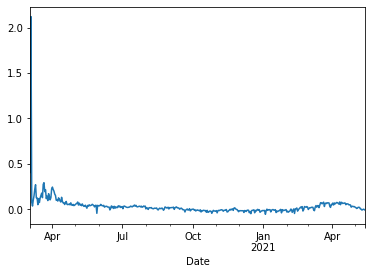

In [12]:
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff = ts_log_diff.dropna(axis=0)
ts_log_diff.plot()

In [13]:
test2 = adfuller(ts_log_diff)
print('ADF Statistic: %f' % test2[0])
print('p-value: %f' % test2[1])

ADF Statistic: -4.476372
p-value: 0.000217


In [14]:
#ts_log_diff0 = ts_log_diff - ts_log_diff.shift(1)
#ts_log_diff0 = ts_log_diff0.dropna(axis=0)
#adfuller_test(ts_log_diff0)
#ts_log_diff0.plot()

<AxesSubplot:xlabel='Date'>

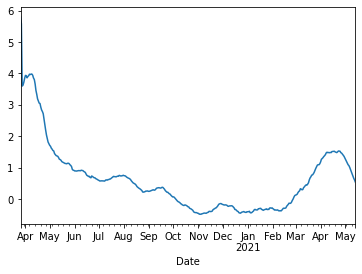

In [15]:
ts_log_diffS = ts_log - ts_log.shift(24)
ts_log_diffS = ts_log_diffS.dropna(axis=0)
ts_log_diffS.plot()

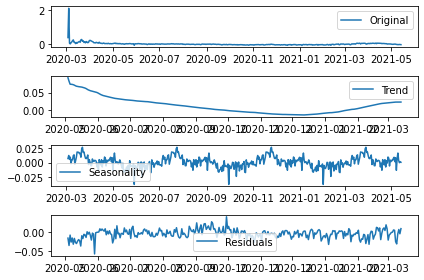

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_diff,period=124)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

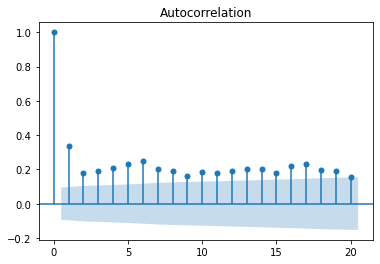

In [18]:
ACF = plot_acf(ts_log_diff,lags=20)

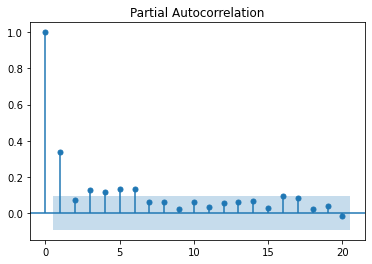

In [19]:
PACF = plot_pacf(ts_log_diff,lags=20)

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [21]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [37]:
#Applied HyperParameters for time serise to get P,D,Q (Removed)

In [38]:
#SARIMAX

In [22]:
model=sm.tsa.statespace.SARIMAX(ts,order=(11, 1, 8),seasonal_order=(13, 1, 8, 30),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit()

<AxesSubplot:xlabel='Date'>

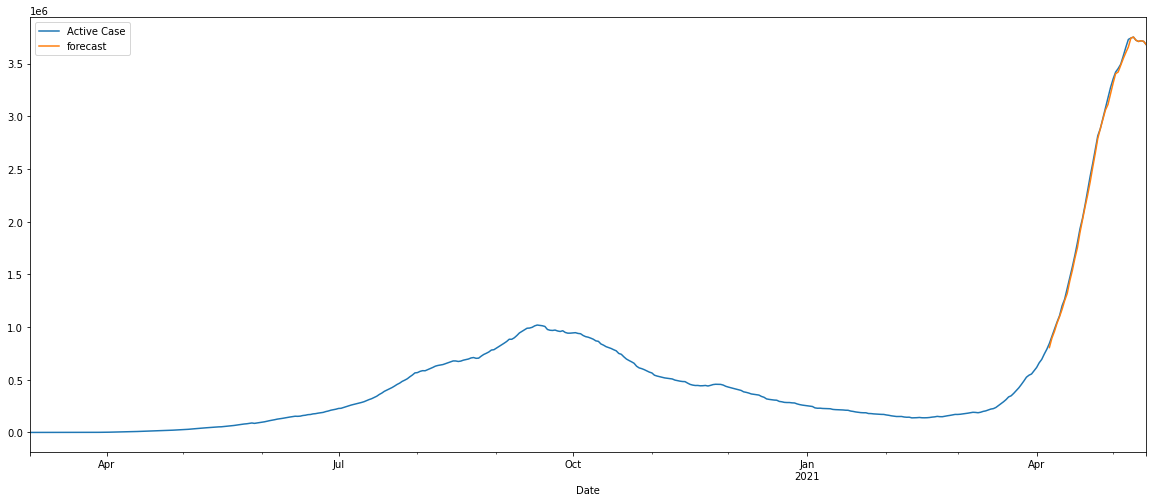

In [23]:
df['forecast']=results.predict(start=400,end=480)
df[['Active Case','forecast']].plot(figsize=(20,8))

In [24]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          Active Case   No. Observations:                  439
Model:             SARIMAX(11, 1, 8)x(13, 1, 8, 30)   Log Likelihood                 -69.067
Date:                              Sat, 15 May 2021   AIC                            220.133
Time:                                      16:21:10   BIC                            217.915
Sample:                                  03-02-2020   HQIC                           192.723
                                       - 05-14-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1816      6.262      0.029      0.977     -12.091      12.454
ar.L2          0.24

In [25]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,10)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case,forecast
2021-05-19,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-22,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

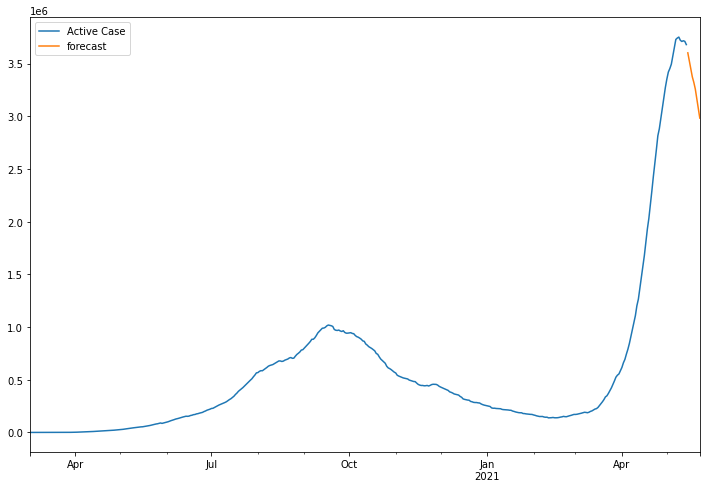

In [26]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 439, end = 448, dynamic= True)  
future_df[['Active Case', 'forecast']].plot(figsize=(12, 8))

In [27]:
future_df.to_excel('15 Active11 1 8_13 1 8 30.xlsx')

In [28]:
future_df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case,forecast
2021-05-19,NaN,NaN,NaN,NaN,NaN,3.322513e+06
2021-05-20,NaN,NaN,NaN,NaN,NaN,3.258407e+06
2021-05-21,NaN,NaN,NaN,NaN,NaN,3.168629e+06
2021-05-22,NaN,NaN,NaN,NaN,NaN,3.074156e+06
2021-05-23,NaN,NaN,NaN,NaN,NaN,2.982508e+06
